In [229]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt


In [230]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

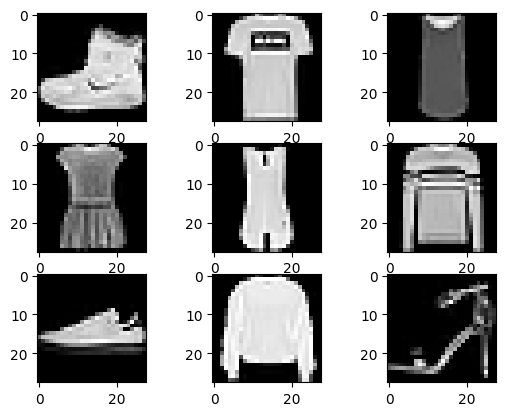

In [231]:
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [232]:
# Question 1
print("Classes: ",len(set(list(y_train))))
print("Dimensions: ",x_train[0].shape)

x_train = x_train/255.0
x_test = x_test/255.0

Classes:  10
Dimensions:  (28, 28)


In [233]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [234]:
def create_cnn1():
    model = Sequential()
    model.add(keras.layers.Conv2D(32, (5, 5), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [235]:
def create_cnn2():
    model = Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
    model.add(keras.layers.Conv2D(32, (3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [236]:
def create_model():
    model = Sequential()
    model.add(tf.keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [237]:
cnn1 = create_cnn1()
cnn1.build((28,28))
cnn1.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_37 (Flatten)        (None, 4608)              0         
                                                                 
 dense_122 (Dense)           (None, 100)               460900    
                                                                 
 dense_123 (Dense)           (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [238]:
cnn2 = create_cnn2()
cnn2.build((28,28))
cnn2.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_38 (Flatten)        (None, 4608)              0         
                                                                 
 dense_124 (Dense)           (None, 100)               460900    
                                                                 
 dense_125 (Dense)           (None, 10)                1010      
                                                     

In [239]:
regular = create_model()
regular.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_39 (Flatten)        (None, 784)               0         
                                                                 
 dense_126 (Dense)           (None, 128)               100480    
                                                                 
 dense_127 (Dense)           (None, 64)                8256      
                                                                 
 dense_128 (Dense)           (None, 32)                2080      
                                                                 
 dense_129 (Dense)           (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [240]:
history1 = regular.fit(x_train,y_train,epochs=30,batch_size=512)

Epoch 1/30
118/118 [==============================] - 1s 4ms/step - loss: 0.7303 - accuracy: 0.7435
Epoch 2/30
118/118 [==============================] - 1s 5ms/step - loss: 0.4533 - accuracy: 0.8420
Epoch 3/30
118/118 [==============================] - 1s 4ms/step - loss: 0.4045 - accuracy: 0.8588
Epoch 4/30
118/118 [==============================] - 1s 5ms/step - loss: 0.3742 - accuracy: 0.8674
Epoch 5/30
118/118 [==============================] - 1s 5ms/step - loss: 0.3592 - accuracy: 0.8717
Epoch 6/30
118/118 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8773
Epoch 7/30
118/118 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8805
Epoch 8/30
118/118 [==============================] - 1s 4ms/step - loss: 0.3177 - accuracy: 0.8847
Epoch 9/30
118/118 [==============================] - 1s 5ms/step - loss: 0.3071 - accuracy: 0.8875
Epoch 10/30
118/118 [==============================] - 1s 5ms/step - loss: 0.3006 - accuracy: 0.8898

In [241]:
history = cnn1.fit(x_train,y_train,epochs=30,batch_size=512)

Epoch 1/30
118/118 [==============================] - 1s 6ms/step - loss: 0.6079 - accuracy: 0.7901
Epoch 2/30
118/118 [==============================] - 1s 6ms/step - loss: 0.3870 - accuracy: 0.8666
Epoch 3/30
118/118 [==============================] - 1s 6ms/step - loss: 0.3429 - accuracy: 0.8808
Epoch 4/30
118/118 [==============================] - 1s 6ms/step - loss: 0.3116 - accuracy: 0.8912
Epoch 5/30
118/118 [==============================] - 1s 6ms/step - loss: 0.2912 - accuracy: 0.8977
Epoch 6/30
118/118 [==============================] - 1s 6ms/step - loss: 0.2721 - accuracy: 0.9042
Epoch 7/30
118/118 [==============================] - 1s 6ms/step - loss: 0.2572 - accuracy: 0.9088
Epoch 8/30
118/118 [==============================] - 1s 6ms/step - loss: 0.2462 - accuracy: 0.9121
Epoch 9/30
118/118 [==============================] - 1s 6ms/step - loss: 0.2328 - accuracy: 0.9173
Epoch 10/30
118/118 [==============================] - 1s 5ms/step - loss: 0.2236 - accuracy: 0.9196

In [242]:
history3 = cnn2.fit(x_train,y_train,epochs=30,batch_size=512)

Epoch 1/30
118/118 [==============================] - 2s 11ms/step - loss: 0.6331 - accuracy: 0.7797
Epoch 2/30
118/118 [==============================] - 1s 11ms/step - loss: 0.3828 - accuracy: 0.8660
Epoch 3/30
118/118 [==============================] - 1s 12ms/step - loss: 0.3274 - accuracy: 0.8851
Epoch 4/30
118/118 [==============================] - 1s 12ms/step - loss: 0.2859 - accuracy: 0.8982
Epoch 5/30
118/118 [==============================] - 1s 12ms/step - loss: 0.2650 - accuracy: 0.9057
Epoch 6/30
118/118 [==============================] - 1s 11ms/step - loss: 0.2378 - accuracy: 0.9153
Epoch 7/30
118/118 [==============================] - 1s 12ms/step - loss: 0.2263 - accuracy: 0.9179
Epoch 8/30
118/118 [==============================] - 1s 13ms/step - loss: 0.2121 - accuracy: 0.9226
Epoch 9/30
118/118 [==============================] - 1s 12ms/step - loss: 0.2004 - accuracy: 0.9275
Epoch 10/30
118/118 [==============================] - 1s 11ms/step - loss: 0.1809 - accura

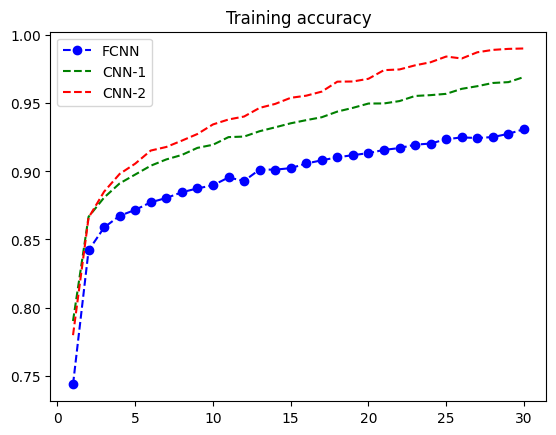

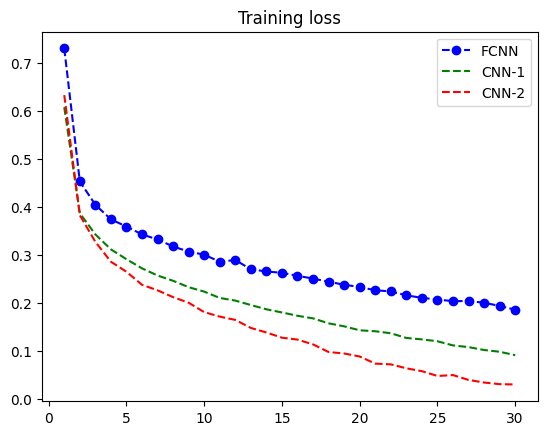

In [245]:
acc1 = history1.history['accuracy']
loss1 = history1.history['loss']

acc2 = history.history['accuracy']
loss2 = history.history['loss']

acc3 = history3.history['accuracy']
loss3 = history3.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc1, 'bo--', label='FCNN')
plt.plot(epochs, acc2, 'g--', label='CNN-1')
plt.plot(epochs, acc3, 'r--', label='CNN-2')

plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss1, 'bo--', label='FCNN')
plt.plot(epochs, loss2, 'g--', label='CNN-1')
plt.plot(epochs, loss3, 'r--', label='CNN-2')
plt.title('Training loss')
plt.legend()

plt.show()

In [246]:
test_loss, test_acc = cnn2.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.3578 - accuracy: 0.9224 - 712ms/epoch - 2ms/step


In [247]:
test_loss, test_acc = cnn1.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.2596 - accuracy: 0.9175 - 655ms/epoch - 2ms/step


In [248]:
test_loss, test_acc = regular.evaluate(x_test,y_test,verbose=2)

313/313 - 0s - loss: 0.3423 - accuracy: 0.8857 - 325ms/epoch - 1ms/step


In [227]:
# Question 4
# CNN outperforms FCNN and converges faster too

In [228]:
# Question 5
# CNN has significantly more parameters to train

In [ ]:
# Question 6
# CNN takes longer to train due to more parameters required